<a href="https://colab.research.google.com/github/shammud/python/blob/main/Sea_Levels_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea-Level predictor project

---


This is a freeCodeCamp project

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

---
### Exercise 1 - Load in the data 
---

Load in the sea-levels data and have a look, dont forget to check the numerical and technical summaries and get a feel for the dataset

In [84]:
import pandas as pd
sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
sea_data.info()
sea_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


---
### Exercise 2 - scatter plot 
Create a  scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

*hint: try using inline*

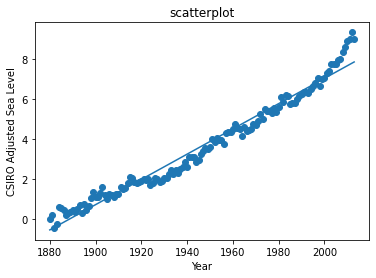

In [83]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

def create_scatter_plot(df):
 x=df['Year'].to_numpy('int64')
 y=df['CSIRO Adjusted Sea Level'].to_numpy('float64')
 regression=linregress(x,y)
 slope =regression.slope 
 intercept =regression.intercept
 plt.xlabel('Year')
 plt.ylabel('CSIRO Adjusted Sea Level')
 plt.scatter(x,y)
 plt.plot(x,x*slope+intercept)
 plt.title('scatterplot')
 plt.show()

sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
create_scatter_plot(sea_data) 

---
### Exercise 3 - Clean the data 

The column NOAA has null values in a number of rows.  Clean the data, producing a new dataframe. 


In [45]:
import pandas as pd
import numpy as np

def clean_null_noaa(df):
  cleaned_df=df[~np.isnan(df).any(axis=1)]
  return cleaned_df
  
sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
cleaned_sea_data=clean_null_noaa(sea_data)  


### Exercise 3 - plot scatter graph for NOAA adjusted levels
---


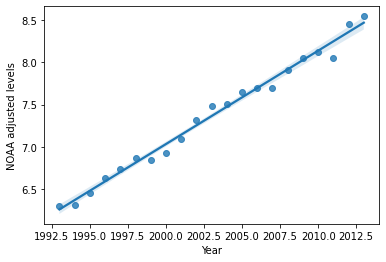

In [69]:
import pandas as pd
import seaborn as sns

def create_scatter_plot(data):
  cleaned_df=clean_null_noaa(data)
  x=cleaned_df['Year'].to_numpy('int64')
  y=cleaned_df['NOAA Adjusted Sea Level'].to_numpy('float64')
  chart=sns.regplot(x=x,y=y)
  chart.set_xlabel('Year')
  chart.set_ylabel('NOAA adjusted levels')

#sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
create_scatter_plot(cleaned_sea_data) 

---
### Exercise 4 - plot line of best fit for CSIRO

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot. 
*   Make the line go through the year 2050 to predict the sea level rise in 2050.    

*(Hint:  use numpy to create an array from the first year to 2050 with an increment of 1)*

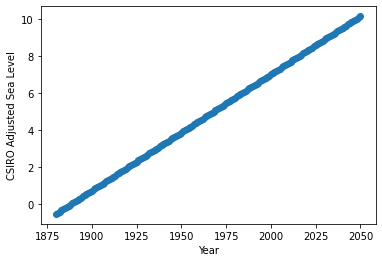

In [82]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

# get scope and y-intercept
def create_line_best_fit_csiro(df):
  x=df['Year'].to_numpy('int64')
  y=df['CSIRO Adjusted Sea Level'].to_numpy('float64')
  regression=linregress(x,y)
  slope =regression.slope 
  intercept =regression.intercept

# create an extended range for x to predict sea level in 2050
  added_years=np.arange(2014,2051)
  new_x=np.concatenate((x,added_years))
  new_y=new_x*slope+intercept

# draw the scatter plot with line of best fit
  plt.xlabel('Year')
  plt.ylabel('CSIRO Adjusted Sea Level')
  plt.scatter(new_x,new_y)
  plt.plot(new_x,new_y)
  plt.show()
  
sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
create_line_best_fit_csiro(sea_data)

### Exercise 5 - plot line of best fit for NOAA
---

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot. 
*   Make the line go through the year 2030 to predict the sea level rise in 2030

*(Hint:  use numpy to create an array from the first year to 2030 with an increment of 1 AND remember to use noaa, which has NaN rows removed)*

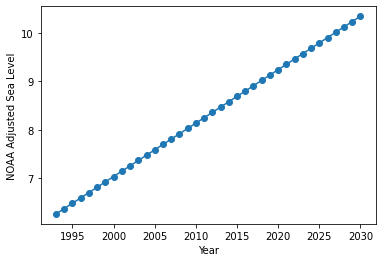

In [81]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

# get scope and y-intercept
def create_line_best_fit_noaa(df):
  x=df['Year'].to_numpy('int64')
  y=df['NOAA Adjusted Sea Level'].to_numpy('float64')
  regression=linregress(x,y)
  slope =regression.slope 
  intercept =regression.intercept

# create an extended range for x to predict sea level in 2030
  added_years=np.arange(2014,2031)
  new_x=np.concatenate((x,added_years))
  new_y=new_x*slope+intercept

# draw the scatter plot with line of best fit
  plt.xlabel('Year')
  plt.ylabel('NOAA Adjusted Sea Level')
  plt.scatter(new_x,new_y)
  plt.plot(new_x,new_y)
  plt.show()

create_line_best_fit_noaa(cleaned_sea_data)


### Exercise 6 - shorter range (starting 2000)
---

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset and using the CSIRO adjusted levels. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

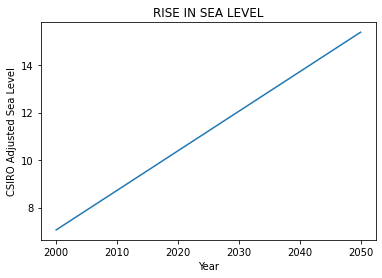

In [80]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

# get scope and y-intercept
def create_shorter_range_csiro(df):
  filtered_df=df[df['Year'] >=2000]
  x=filtered_df['Year'].to_numpy('int64')
  y=filtered_df['CSIRO Adjusted Sea Level'].to_numpy('float64')
  regression=linregress(x,y)
  slope =regression.slope 
  intercept =regression.intercept

# create an extended range for x to predict sea level in 2050
  added_years=np.arange(2014,2051)
  new_x=np.concatenate((x,added_years))
  new_y=new_x*slope+intercept

# draw the line of best fit
  plt.xlabel('Year')
  plt.ylabel('CSIRO Adjusted Sea Level')
  plt.title("RISE IN SEA LEVEL")
  plt.plot(new_x,new_y)
  plt.show()
  
sea_data=pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
create_shorter_range_csiro(sea_data)

### Exercise 6 - add labels to the axes  
---

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level"

In [ ]:
# get scope and y-intercept

# create an extended range for x to predict sea level in 2050


# draw the scatter plot with line of best fit
